In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('datasets/Position_Salaries.csv')
dataset.head(3)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000


In [3]:
dataset.corr() # Check correlation between features

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


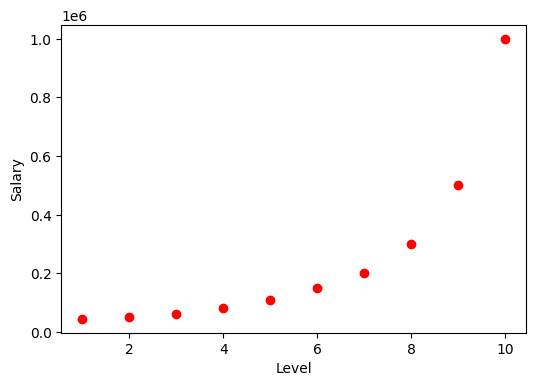

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(dataset['Level'], dataset['Salary'], color='red')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [5]:
x = dataset[['Level']] # Features should be in 2D array for sklearn
y = dataset['Salary'] # Target variable can be in 1D array

In [6]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2) # degree of polynomial i.e. till how many powers we want to go
pf.fit(x) # fit the polynomial features
x = pf.transform(x) # transform the features to polynomial features

Now splitting into two parts

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

applying polynomial regression

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Create a linear regression model
lr.fit(x_train, y_train) # Fit the model on training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
lr.score(x_test, y_test)*100 # Check the accuracy score of the model on test data

76.66492889299911

In [10]:
y_pred = lr.predict(x) # Predict the salary using the model

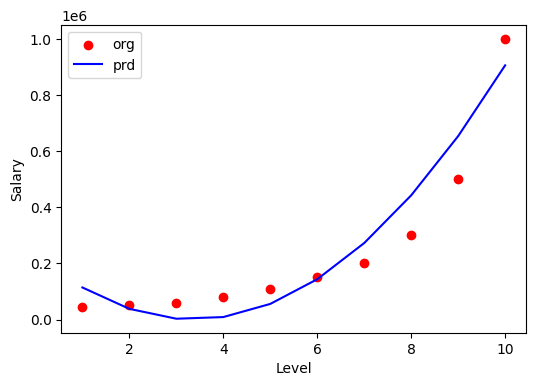

In [11]:
plt.figure(figsize=(6, 4))
plt.scatter(dataset["Level"], dataset["Salary"], color="red")
plt.plot(dataset["Level"], y_pred, color="blue")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend(["org", "prd"])
plt.show()

to test this 

In [14]:
test = pf.transform([[5]])
test

d:\VS Code Files\AIML\exp_learning\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[ 1.,  5., 25.]])

In [15]:
lr.predict(test) # Predict the salary for level 8

array([55666.69022046])